In [415]:
import numpy as np
import scipy as sp
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [378]:
h = 0.01

A = np.array([[0, 1, 0],
            [1, 0, 1],
            [0, -1, -5]])

B = np.array([0, 0, 1])

In [380]:
def discrete_sys(A, B, h):
    lam, S = np.linalg.eig(A)
    invS = np.linalg.inv(S);
    diagExp = np.diag(np.exp(lam * h))
    Anew = np.dot(np.dot(S, diagExp), invS)

    diagInteg = diagExp - np.diag(np.ones(A.shape[0])) 
    
    for i in range(0, A.shape[0]):
        diagInteg[i][i] = diagInteg[i][i] / lam[i]
    
    Bnew = np.dot(np.dot(np.dot(S, diagInteg), invS) , B)
    
    return Anew, Bnew
    

In [384]:
u_control = lambda x, th : th[0]*x[0] + th[1]*x[1] + th[2]*x[2]

def d_parametrized_system(A, B, u_func, th):
    def d_system(x):
        return np.dot(A, x) + B * u_func(x, th)
    return d_system

def lin_parametrized_system(a, u_func, th):
    def lin_system(t, x):
        return np.array([
                     x[1],
                     x[0] + x[2],
                     -x[1] - a* x[2] + u_func(x, th)
                 ])
    return lin_system
    
def parametrized_system(a, u_func, th):
    def system(t, x):
        return np.array([
                     x[1],
                     0.5 * ((1 + x[2])**2 / (1 - x[0])**2 - 1),
                     -(1 + x[2]) * x[1] / (1 + x[1]) - a * (1 - x[0]) * x[2] + (1 - x[0]) * u_func(x, th)
                 ])
    return system

In [412]:
def plot_graphs(system, num_it, h, init_cond, ax, title):
    result = np.array([init_cond])
    for i in range(1, num_it):
        ksi = system(result[i - 1])
        result = np.append(result, [ksi], axis=0)
    interval = np.arange(0, num_it) * h
    ax.plot(interval, result[:, 0], interval, result[:, 1], interval, result[:, 2])
    ax.legend([r'$\xi_1$', r'$\xi_2$', r'$\xi_3$'], fontsize=20)
    ax.set_title(title, fontsize = 15)
    ax.grid()
    return ax

from scipy.integrate import solve_ivp

def plot_time(system, tstr, init_cond, ax, title):
    result = solve_ivp(system ,tstr, init_cond, method='RK23',
    t_eval=np.linspace(tstr[0], tstr[1], 150))
    ax.plot(result.t, result.y[0], result.t, result.y[1], result.t, result.y[2])
    ax.legend([r'$x_1$', r'$x_2$', r'$x_3$'], fontsize=20)
    ax.set_title(title, fontsize = 15)
    ax.grid()
    return ax, result

In [413]:
h = 1
Ad, Bd = discrete_sys(A, B, h)
lam, S = np.linalg.eig(Ad)
Ad = expm(A*h)
print(lam)
print(Ad, Bd)

[2.507005461295122 0.320521730959589 0.008385227133681]
[[ 1.522168654868945  1.100501561384686  0.171450648259318]
 [ 1.100501561384686  1.350718006609626  0.243248320088098]
 [-0.171450648259318 -0.243248320088098 -0.03697424209018 ]] [0.070143601321925 0.171450648259318 0.173104718766172]


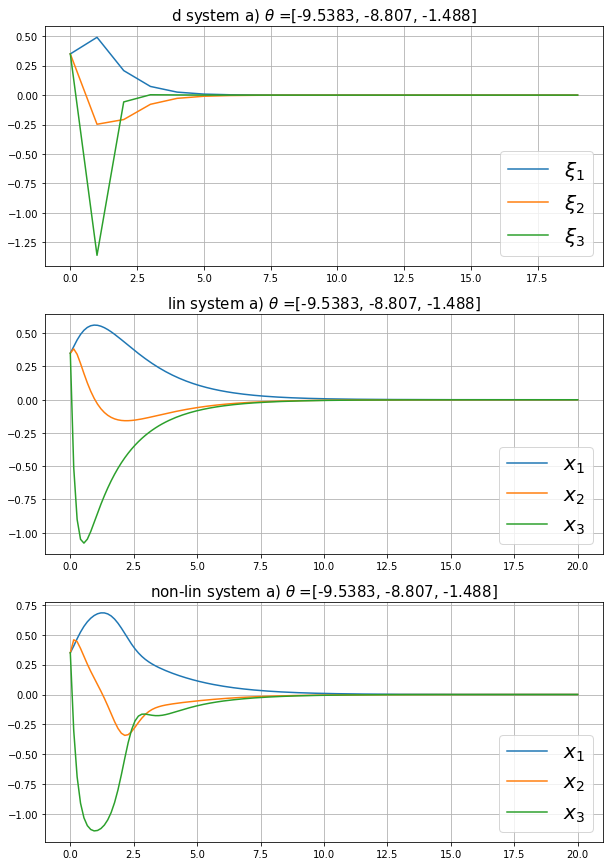

In [433]:
pp = PdfPages('foo.pdf')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,15))
num_it = 20
init_cond = np.array([0.35, 0.35, 0.35])

th = [-9.5383, -8.807, -1.488]
plot_graphs(d_parametrized_system(Ad, Bd, u_control, th),
          num_it, h, init_cond,
          ax1, r"d system a) $\theta$ =[-9.5383, -8.807, -1.488]")

t_interval = np.array([0, 20])

plot_time(lin_parametrized_system(5, u_control, th),
          t_interval, init_cond,
          ax2, r"lin system a) $\theta$ =[-9.5383, -8.807, -1.488]")

plot_time(parametrized_system(5, u_control, th),
          t_interval, init_cond,
          ax3, r"non-lin system a) $\theta$ =[-9.5383, -8.807, -1.488]")
plt.show()
pp.savefig(fig)

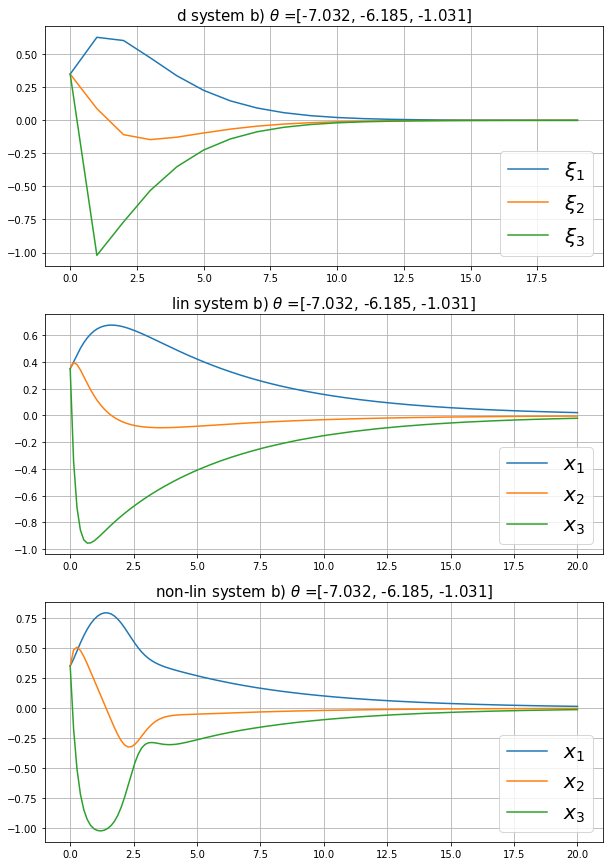

In [434]:
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,15))
th = [-7.032, -6.185, -1.031]
plot_graphs(d_parametrized_system(Ad, Bd, u_control, th),
          num_it, h, init_cond,
          ax1, r"d system b) $\theta$ =[-7.032, -6.185, -1.031]")

t_interval = np.array([0, 20])

plot_time(lin_parametrized_system(5, u_control, th),
          t_interval, init_cond,
          ax2, r"lin system b) $\theta$ =[-7.032, -6.185, -1.031]")

plot_time(parametrized_system(5, u_control, th),
          t_interval, init_cond,
          ax3, r"non-lin system b) $\theta$ =[-7.032, -6.185, -1.031]")
plt.show()
pp.savefig(fig1)

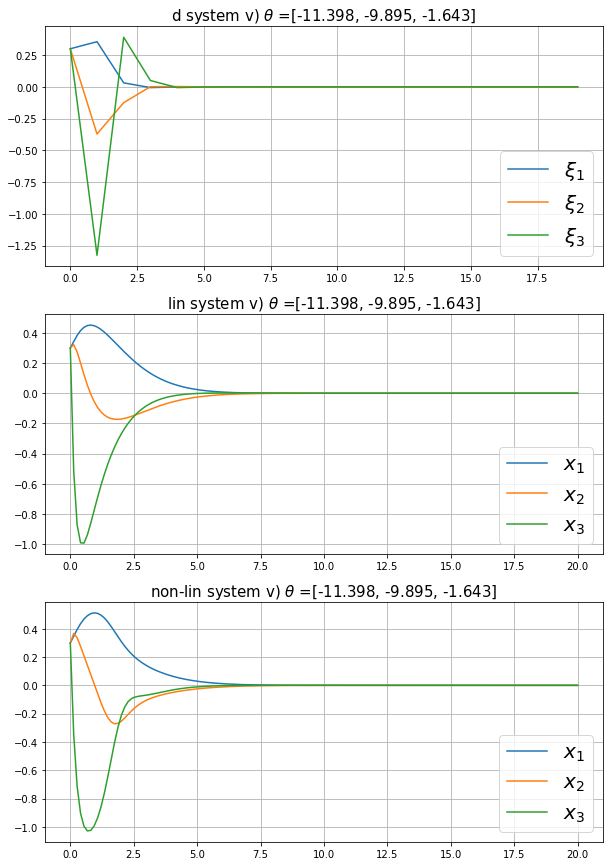

In [435]:
fig2, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,15))
init_cond = np.array([0.3, 0.3, 0.3])
th = [-11.398, -9.895, -1.643]
plot_graphs(d_parametrized_system(Ad, Bd, u_control, th),
          num_it, h, init_cond,
          ax1, r"d system v) $\theta$ =[-11.398, -9.895, -1.643]")

t_interval = np.array([0, 20])

plot_time(lin_parametrized_system(5, u_control, th),
          t_interval, init_cond,
          ax2, r"lin system v) $\theta$ =[-11.398, -9.895, -1.643]")

plot_time(parametrized_system(5, u_control, th),
          t_interval, init_cond,
          ax3, r"non-lin system v) $\theta$ =[-11.398, -9.895, -1.643]")
plt.show()
pp.savefig(fig2)

In [436]:
pp.close()